In [1]:
import seaborn as sns
from src.data_analysis import show_displot, show_relplot, show_pie, show_pair
from src.data_analysis import train, dev, test, df

In [2]:
df.head()

,Unnamed: 0,cycle,capacity,SoH,resistance,CCCT,CVCT,CS_Name
0,0,1.0,1.126385,0.825175,0.094009,6613.059052,2251.498033,CS2_35
1,1,2.0,1.126160,0.815965,0.091661,6612.402800,2231.967052,CS2_35
2,2,3.0,1.125966,0.815977,0.094649,6608.560673,2228.216959,CS2_35
3,3,4.0,1.118508,0.825194,0.091413,6604.732222,2247.561061,CS2_35
4,4,5.0,1.117210,0.806900,0.091413,6629.211049,2077.692393,CS2_35


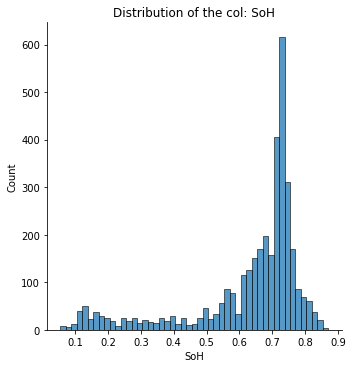

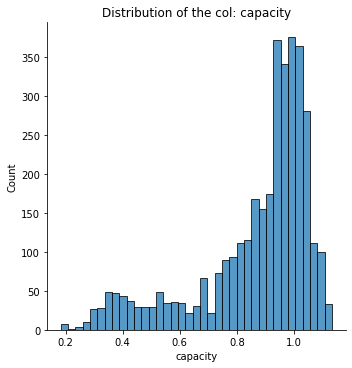

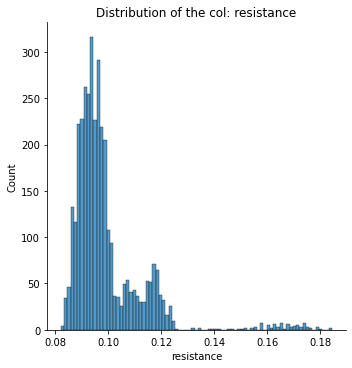

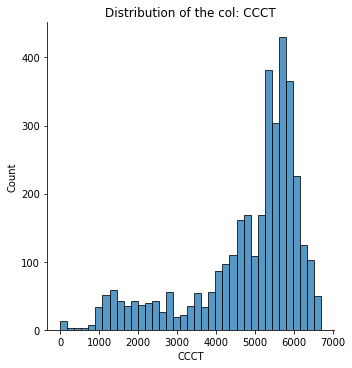

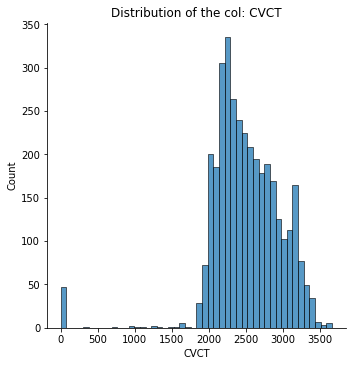

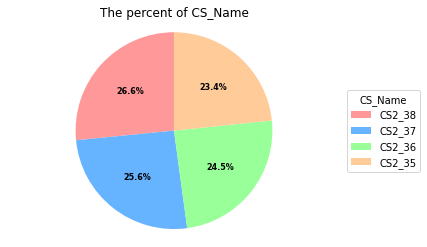

In [3]:
show_displot(df, 'SoH')
show_displot(df, 'capacity')
show_displot(df, 'resistance')
show_displot(df, 'CCCT')
show_displot(df, 'CVCT')

show_pie(df, 'CS_Name')

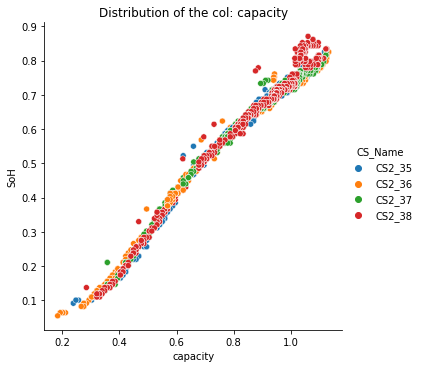

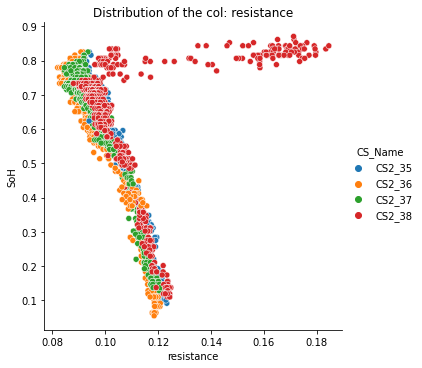

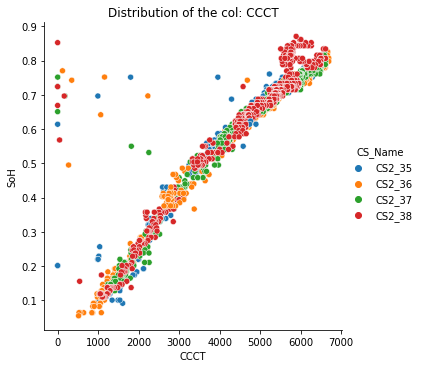

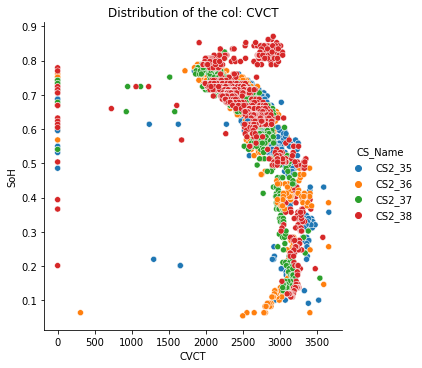

In [4]:
show_relplot(df, 'capacity')
show_relplot(df, 'resistance')
show_relplot(df, 'CCCT')
show_relplot(df, 'CVCT')

In [ ]:
sns.violinplot(df, x='SoH', hue='CS_Name')

In [ ]:
cols = ['cycle', 'capacity', 'resistance', 'CCCT', 'CVCT']

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        show_pair(df, [cols[i], cols[j]])

In [17]:
df.head()

,Unnamed: 0,cycle,capacity,SoH,resistance,CCCT,CVCT,CS_Name
0,0,1.0,1.126385,0.825175,0.094009,6613.059052,2251.498033,CS2_35
1,1,2.0,1.126160,0.815965,0.091661,6612.402800,2231.967052,CS2_35
2,2,3.0,1.125966,0.815977,0.094649,6608.560673,2228.216959,CS2_35
3,3,4.0,1.118508,0.825194,0.091413,6604.732222,2247.561061,CS2_35
4,4,5.0,1.117210,0.806900,0.091413,6629.211049,2077.692393,CS2_35


In [19]:
for col in df.columns:
    print(col, df[col].isna().mean())

Unnamed: 0 0.0
cycle 0.0
capacity 0.0
SoH 0.0
resistance 0.0
CCCT 0.0
CVCT 0.013919821826280624
CS_Name 0.0


In [1]:
from src.data_process import DataProcess, SoHDataset
from src.model import SoHDNNModel, train

In [2]:
dp = DataProcess()

In [3]:
a, b, c, d = dp.forward()

feature CVCT has null value: 0.014874739039665972


In [4]:
train_data = SoHDataset(a, c)
test_data = SoHDataset(b, d)

In [5]:
model = SoHDNNModel(a.shape[1], 1, 128, 2)

In [6]:
train(model, train_data, 5, 10, test_data, save_dir='data')

Epoch: 1 / 5 (device: cpu)
|step:   0 |loss: 0.787 |
|step:  10 |loss: 0.388 |
|step:  20 |loss: 0.136 |
|step:  30 |loss: 0.029 |
|step:  40 |loss: 0.015 |
|step:  50 |loss: 0.016 |
|step:  60 |loss: 0.010 |
|step:  70 |loss: 0.008 |
|step:  80 |loss: 0.010 |
|step:  90 |loss: 0.007 |
|step: 100 |loss: 0.006 |
|valid dataset: |MAE: 0.00529500050470233 |RMSE: 0.0727667510509491
Epoch: 2 / 5 (device: cpu)
|step:   0 |loss: 0.005 |
|step:  10 |loss: 0.002 |
|step:  20 |loss: 0.005 |
|step:  30 |loss: 0.003 |
|step:  40 |loss: 0.002 |
|step:  50 |loss: 0.001 |
|step:  60 |loss: 0.002 |
|step:  70 |loss: 0.003 |
|step:  80 |loss: 0.003 |
|step:  90 |loss: 0.001 |
|step: 100 |loss: 0.002 |
|valid dataset: |MAE: 0.0024051624350249767 |RMSE: 0.04904245585203171
Epoch: 3 / 5 (device: cpu)
|step:   0 |loss: 0.003 |
|step:  10 |loss: 0.004 |
|step:  20 |loss: 0.003 |
|step:  30 |loss: 0.003 |
|step:  40 |loss: 0.002 |
|step:  50 |loss: 0.002 |
|step:  60 |loss: 0.002 |
|step:  70 |loss: 0.001 |


In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/cv.csv')

In [3]:
sns.relplot(df, x='SoH')

,Unnamed: 0,cycle,capacity,SoH,resistance,CCCT,CVCT,CS_Name,result
0,0,0.537500,0.125037,0.623609,-0.444042,0.076660,0.083453,CS2_35,0.623609
1,1,0.541094,0.077621,0.614440,-0.284067,0.013285,0.153880,CS2_35,0.614440
2,2,0.544689,-0.041511,0.614332,-0.054746,-0.004367,-1.832324,CS2_35,0.614332
3,3,0.548283,-0.119096,0.614295,0.066382,-2.982028,-2.632852,CS2_35,0.614295
4,4,0.551877,-0.045988,0.614363,-0.259370,0.161997,-0.505355,CS2_35,0.614363
...,...,...,...,...,...,...,...,...,...
570,147,1.353435,-1.023424,-100.000000,0.784517,-1.053394,1.395448,CS2_38,0.399680
571,148,1.357030,-1.064507,-100.000000,0.791658,-1.080169,1.394489,CS2_38,0.388657
572,149,1.360624,-1.064478,-100.000000,0.741110,-1.104143,1.424706,CS2_38,0.389535
573,150,1.364219,-1.064466,-100.000000,0.734008,-1.114760,1.426590,CS2_38,0.389812


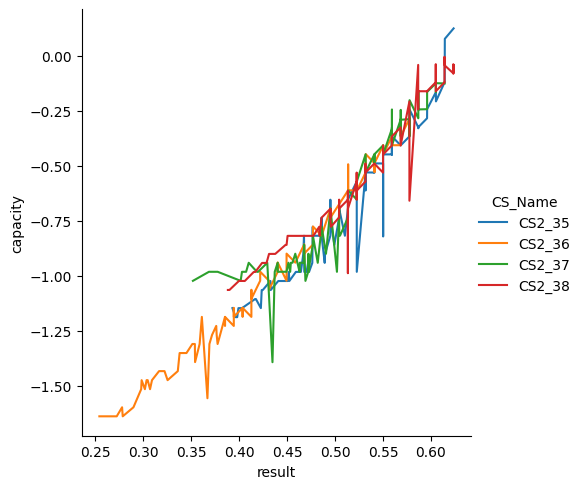

In [7]:
sns.relplot(df, x='result', y='capacity', kind='line', hue='CS_Name')